# <font color='red' style='font-size: 30px;'> Classificação de Pokémon   </font>
<hr style='border: 2px solid red;'>

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# <font color = 'black' style='font-size: 24px;'> Dataset </font>  
<hr style = 'border: 1px solid black;'>

## Dados
---

<p style='line-height: 2; text-align: justify; text-indent: 35px;'> O conjunto de dados utilizados contém dados sobre 802 pokémon, abrangindo todas as sete gerações. As informações contidas no dataset incluem estatísticas básicas, desempenho em relação a outros tipos, altura, peso, classificação, etapas do ovo, pontos de experiência, habilidades etc. Esse dataset foi retirado da plataforma Kaggle e está disponível <a href="https://www.kaggle.com/datasets/rounakbanik/pokemon?resource=download">aqui</a>. </p>


## Significado das Colunas
---
   
<ul style='line-height: 2; text-align: justify;'>    
    <li><b>Name</b>: Nome do pokémon em inglês.</li>     
    <li><b>Classfication</b>: A classificação do Pokémon conforme descrito pelo Sun e Moon Pokedex.</li>
    <li><b>Type1</b>: O Tipo Primário do Pokémon.</li>
    <li><b>Type2</b>: O Tipo Secundário do Pokémon.</li>
    <li><b>Against_</b>: O percentual de dano recebido de um ataque com elemento específico.</li>    
    <li><b>Attack</b>: Ataque base do Pokémon.</li>
    <li><b>Defense</b>: Defesa base do Pokémon.</li>       
    <li><b>HP</b>: Hp base do Pokémon.</li>
    <li><b>Speed</b>: Velocidade base do Pokémon.</li> 
    <li><b>Height_m</b>: Altura do Pokémon em metros.</li> 
    <li><b>Weight_kg</b>: Peso do Pokémon em quilogramas.</li>
    <li><b>Generation</b>: Geração do Pokémon.</li>
    <li><b>is_legendary</b>: Se o Pokémon é lendário ou não.</li>   
</ul>





In [2]:
# Lendo os dados
columns = ['name', 'type1', 'type2', 'against_bug', 'against_bug', 'against_dark', 
           'against_dragon', 'against_electric', 'against_fairy', 'against_fight','against_fire', 'against_flying', 
           'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal','against_poison', 
           'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'defense', 'hp', 'speed',
           'height_m', 'weight_kg', 'generation', 'is_legendary']

data = pd.read_csv("../Dados/pokemon.csv", usecols=columns)
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,height_m,hp,name,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,49,0.7,45,Bulbasaur,45,grass,poison,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,63,1.0,60,Ivysaur,60,grass,poison,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,123,2.0,80,Venusaur,80,grass,poison,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,43,0.6,39,Charmander,65,fire,NaN,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,1.1,58,Charmeleon,80,fire,NaN,19.0,1,0


# <font color = 'black' style='font-size: 24px;'> Pré-Processamento dos Dados </font>  
<hr style = 'border: 1px solid black;'>

In [3]:
# Valores faltantes nos dados
data.isnull().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
defense               0
height_m             20
hp                    0
name                  0
speed                 0
type1                 0
type2               384
weight_kg            20
generation            0
is_legendary          0
dtype: int64

In [4]:
# Substituir valores faltantes pela média aritimética
data['height_m'] = data['height_m'].fillna(value = data['height_m'].mean())
data['weight_kg'] = data['weight_kg'].fillna(value = data['weight_kg'].mean())

In [5]:
# Valores faltantes nos dados
data.isnull().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
defense               0
height_m              0
hp                    0
name                  0
speed                 0
type1                 0
type2               384
weight_kg             0
generation            0
is_legendary          0
dtype: int64

# <font color = 'black' style='font-size: 24px;'> Análise Estatística dos Dados </font>  
<hr style = 'border: 1px solid black;'>

<p style='line-height: 2; text-align: justify; text-indent: 35px;'>Vejamos como se dá a distribuição dos pokemons de acordo com o tipo primário do Pokémon.</p>

In [6]:
data['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [7]:
# Agrupando os Pokémons por tipo primário
amount_of_pokemon = data.groupby('type1')['type1'].count()
amount_of_pokemon.sort_values(ascending=False, inplace=True)

# Tipos dos Pokemons
types = amount_of_pokemon.index

# Pokemons por tipo
amount_of_pokemon 

type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

<AxesSubplot:title={'center':'Distribuição dos Pokémon por Tipo Primário'}, xlabel='Quantidades', ylabel='Tipos'>

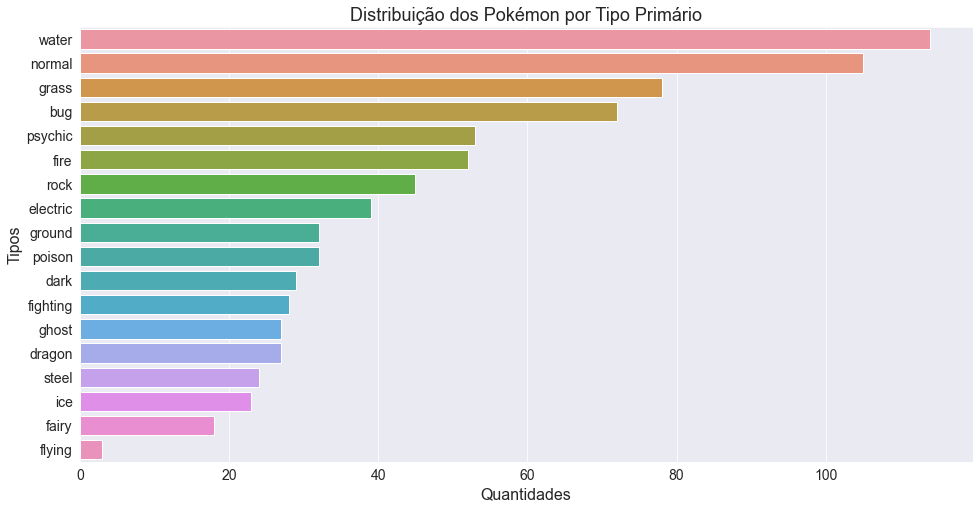

In [8]:
# Palette and Style
sns.set_palette('viridis')
sns.set_style('darkgrid')

# Gráfico de barras
ax = sns.barplot(x=amount_of_pokemon, y=types, orient='h')
ax.figure.set_size_inches(16,8)
ax.tick_params(labelsize=14)
ax.set_title('Distribuição dos Pokémon por Tipo Primário', fontsize=18)
ax.set_xlabel("Quantidades", fontsize=16)
ax.set_ylabel("Tipos", fontsize=16)
ax

# <font color = 'black' style='font-size: 24px;'> Criando o Modelo </font>  
<hr style = 'border: 1px solid black;'>

## Matriz de Correlação
---


In [9]:
data.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,against_steel,against_water,attack,defense,height_m,hp,speed,weight_kg,generation,is_legendary
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,...,0.055504,-0.254732,-0.054175,-0.036474,-0.059781,0.034897,-0.043802,-0.031344,-0.001549,0.027864
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,...,-0.119758,-0.001976,-0.098849,0.048039,0.018608,0.010589,-0.000326,0.037634,-0.016013,0.136315
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,...,-0.227697,-0.096549,0.138217,-0.023794,0.164448,0.089721,0.078123,0.125991,-0.025201,0.014844
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,...,-0.187543,-0.297600,-0.104276,-0.072433,0.003022,-0.035354,0.111422,-0.101403,-0.063180,-0.023151
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,...,0.130323,-0.218937,0.207526,0.001655,0.114993,0.129284,0.065401,0.098210,0.150801,0.050165
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,...,0.165066,0.205249,0.149123,0.150424,0.058524,0.109425,-0.050495,0.159761,0.000681,-0.059132
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,...,0.115992,-0.242635,-0.005762,0.037921,-0.085422,-0.099242,-0.079129,-0.043925,0.061157,-0.011073
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,...,0.001264,-0.311997,-0.002991,-0.127950,-0.072533,-0.060624,-0.043381,-0.125959,0.058204,-0.062214
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,...,-0.002008,0.009046,-0.034549,0.136490,0.031626,-0.062052,-0.029007,0.046506,0.038027,0.170746
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,...,0.082812,0.229968,0.036787,0.139542,0.029533,0.056886,-0.153618,0.048407,-0.107987,-0.070826


## Dados de Treino e Teste
---


In [10]:
# Semente
SEED = 42
np.random.seed(SEED)

In [11]:
# Variável Explicativas
X = data.drop(columns = ['type1', 'type2', 'name']) 

# Variáveis Dependente
y = data['type1']

In [12]:
# Dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

## Random Forest
---

In [13]:
# Treinando o modelo
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [14]:
# Predições
predictions = model.predict(X_test)

# Acurácia
model.score(X_test, y_test)

0.8716577540106952

## Importância das Features na Definição do Tipo do Pokémon
---

In [15]:
importances = pd.DataFrame()
importances['feature'] = X.columns
importances['importance'] = model.feature_importances_

importances.sort_values(by='importance', ascending=False, inplace=True)

<AxesSubplot:title={'center':'Distribuição dos Pokémon por Tipo Primário'}, xlabel='% de Importância', ylabel='Feature'>

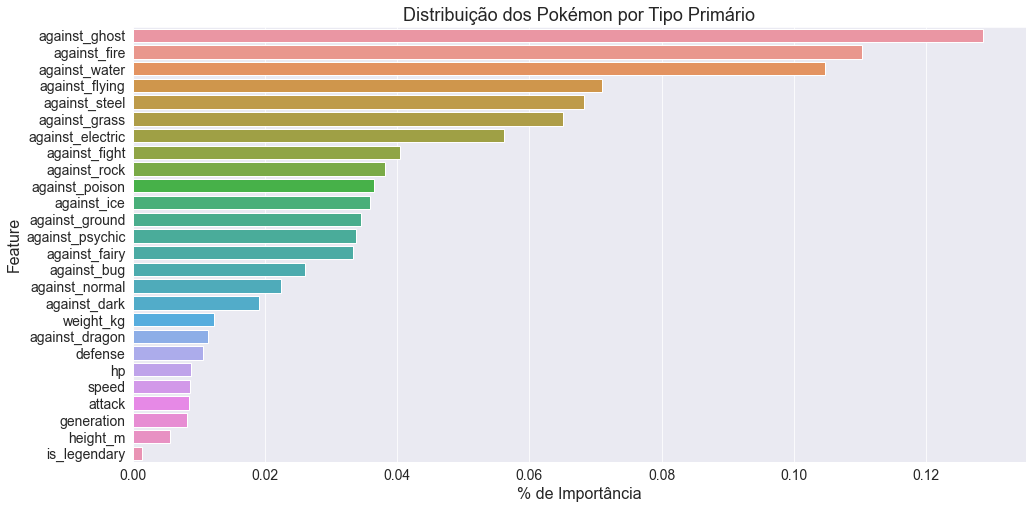

In [16]:
# Gráfico de barras
ax = sns.barplot(x=importances['importance'], y=importances['feature'], orient='h')
ax.figure.set_size_inches(16,8)
ax.tick_params(labelsize=14)
ax.set_title('Distribuição dos Pokémon por Tipo Primário', fontsize=18)
ax.set_xlabel("% de Importância", fontsize=16)
ax.set_ylabel("Feature", fontsize=16)
ax

## Plotando a Árvore de Decisão
---

In [19]:
estimator = estimator = model.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png', width = 3000, height = 2600)